## __Gradiant_Boosting__
#### __It is consist of reducing the errors__

## It is called: __Grandiant Boosting or GBDT__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##### for understanding this Algorithm we will use the following simple dataset for weight prediction


In [2]:
data_ = pd.DataFrame({
    'Person Height(in meter)':[1.6,1.6,1.5,1.8,1.5,1.4],
    'Person Favorite Color':['Blue','Green','Blue','Red','Green','Blue'],
    'Person Gender':['Male','Female','Female','Male','Male','Female'],
    'Person weight(in Kg)':[88,76,56,73,77,57]
})

In [3]:
data_

,Person Height(in meter),Person Favorite Color,Person Gender,Person weight(in Kg)
0,1.6,Blue,Male,88
1,1.6,Green,Female,76
2,1.5,Blue,Female,56
3,1.8,Red,Male,73
4,1.5,Green,Male,77
5,1.4,Blue,Female,57


#### For prediction we use the formula:
#### __new value = old value +learning Rate *residual__
#### let consider the learning rate as 0.1, the result becomes
##### New value = 71.2+0.1*16.8 = 72.9 (for the row).

#### Final values = first prediction+learning rate* 1st residual +2nd residual+ and so on

In [4]:
source ="https://raw.githubusercontent.com/olivierla412/Files/main/heart_disease.csv"

In [5]:
df = pd.read_csv(source)
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
## let's delete the unnamed column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(302, 14)

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
## let's check how many categories are in the target column

df['target'].unique()

array([1, 0])

In [12]:
### let's see the count values of each categorical.

df['target'].value_counts()

## to avoid unbalance problems.

1    164
0    138
Name: target, dtype: int64

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Just find the correlation between features and label(target) using __corrwith()__ method

In [14]:
## Just find the correlation between features and label(target) using corrwith
df.drop('target', axis=1).corrwith(df.target)

age        -0.221476
sex        -0.283609
cp          0.432080
trestbps   -0.146269
chol       -0.081437
fbs        -0.026826
restecg     0.134874
thalach     0.419955
exang      -0.435601
oldpeak    -0.429146
slope       0.343940
ca         -0.408992
thal       -0.343101
dtype: float64

In [15]:
var = df.drop('target', axis=1)

In [16]:
var.corrwith(df.target)

age        -0.221476
sex        -0.283609
cp          0.432080
trestbps   -0.146269
chol       -0.081437
fbs        -0.026826
restecg     0.134874
thalach     0.419955
exang      -0.435601
oldpeak    -0.429146
slope       0.343940
ca         -0.408992
thal       -0.343101
dtype: float64

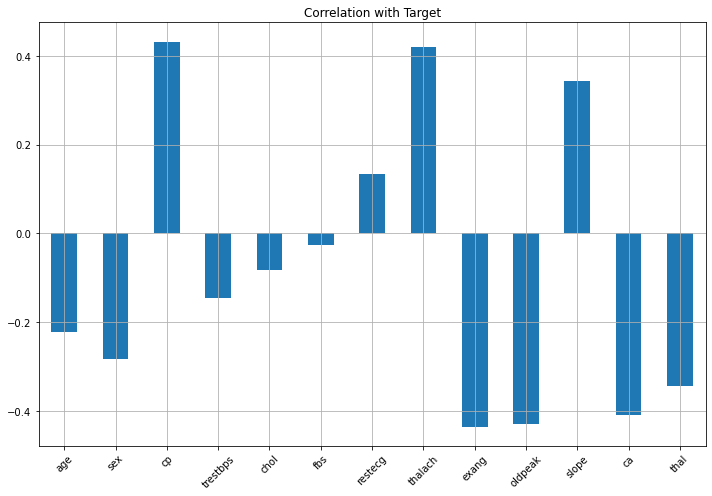

In [17]:
var.corrwith(df.target).plot(kind ='bar',grid = True,figsize =(10, 7),
                            title ='Correlation with Target',rot= 45)
plt.tight_layout()

#### Let's play around feature selection and see if we can build better Model

#### __Model building using SelectPercentile features__

In [18]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2

#### When we apply chi2, we get P-values for all features. Based on P-values,
#### it will select top 80% of features
#### Example- If P-value < 0.05, it will reject the null hypothesis.
#### Default null hypothesis is , there is no relation b/w feature and target.

### __Instantiate SelectPercentile and fit (features, label)__

In [19]:
#Instantiate SelectPercentile and fit (features, label)
x = df.drop('target',axis=1)
y= df.target



In [22]:
Spercentile = SelectPercentile(score_func=chi2, percentile=80)
Spercentile =  Spercentile.fit(x,y)
## for the score function we can use ANOVA too, but this gives us 
## second method.

In [25]:
## seperate the features to check P-values of each

cols = Spercentile.get_support(indices=True)
features = x.columns[cols]

In [26]:
df_score = pd.DataFrame({'features':x.columns,
                         'Chi2Score':Spercentile.scores_,
                        'P_values':Spercentile.pvalues_})




In [31]:
# np.printoptions(suppress = True, linewidth = 100,precision =2)

In [30]:
df_score.sort_values(by='Chi2Score',ascending=False)

### ascending=False is to put the too low P-values first.

## those colums have the best contribution on predicting the target.

,features,Chi2Score,P_values
7,thalach,186.180286,2.168381e-42
9,oldpeak,71.692782,2.514507e-17
11,ca,71.020719,3.534932e-17
2,cp,62.116086,3.237956e-15
8,exang,38.518849,5.422743e-10
0,age,22.210517,2.443317e-06
4,chol,21.690747,3.203327e-06
3,trestbps,15.094591,1.022559e-04
10,slope,9.677715,1.865164e-03
1,sex,7.721690,5.456131e-03


### Let's print the top 80%

In [33]:
print(cols)


[ 0  1  2  3  4  7  8  9 10 11]


In [34]:
print(features)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca'],
      dtype='object')


In [35]:
## create subset of selected features
X = df[features]
Y = df.target

In [38]:
# import the libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [47]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(X)
x_train,x_test,y_train,y_test = train_test_split(x_scaler,Y,
                                                 train_size=0.3,
                                                 random_state=42)


### __GrandientBoostingClassifier__

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report


In [49]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(x_train,y_train)
pred1 = gbdt_clf.predict(x_train)


In [50]:
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred1,output_dict=True))

print("\n=============Train Result==============")

print(f"Accuracy Score:{accuracy_score(y_train,pred1)*100:.2f}%")
print("_____________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("_____________________________________________")
print(f"Confusion Matrix:\n{confusion_matrix(y_train,pred1)}\n")


# ********************* Test Score ****************************

pred2 = gbdt_clf.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test,pred2,output_dict=True))
print("\n=============Test Result==============")

print(f"Accuracy Score:{accuracy_score(y_test,pred2)*100:.2f}%")
print("_____________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_____________________________________________")
print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred2)}\n")




=============Train Result==============
Accuracy Score:100.00%
_____________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0       1.0        1.0           1.0
support    40.0  50.0       1.0       90.0          90.0
_____________________________________________
Confusion Matrix:
[[40  0]
 [ 0 50]]


=============Test Result==============
Accuracy Score:80.19%
_____________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.769231    0.833333  0.801887    0.801282      0.803701
recall      0.816327    0.789474  0.801887    0.802900      0.801887
f1-score    0.792079    0.810811  0.801887    0.801445      0.802152
support    98.000000  114.000000  0.801887  212.000000    212.000000
______________________

#### Let's try if we can improve the performance of our model using Hyperparameter Tuning

## __Hyperparameter Tuning__

In [51]:
from sklearn.model_selection import GridSearchCV


In [60]:
grid_param = {
    'max_depth':range(4,12,2),
    'learning_rate':np.arange(0.1,1,1),
    'min_samples_split':range(4,8,2)
}

In [61]:
grid = GridSearchCV(gbdt_clf,param_grid=grid_param)
grid.fit(x_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.01,
                                                  max_depth=8,
                                                  min_samples_split=6),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 12, 2),
                         'min_samples_split': range(4, 8, 2)})

In [62]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'min_samples_split': 6}

In [63]:
gbdt_clf = GradientBoostingClassifier(max_depth=10,min_samples_split=6,
   
                                      learning_rate=0.1)

gbdt_clf.fit(x_train,y_train)
pred1 = gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(
    y_train,pred1,output_dict=True))


print("\n=============Train Result==============")

print(f"Accuracy Score:{accuracy_score(y_train,pred1)*100:.2f}%")
print("_____________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("_____________________________________________")
print(f"Confusion Matrix:\n{confusion_matrix(y_train,pred1)}\n")


# ********************* Test Score ****************************

pred2 = gbdt_clf.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test,pred2,output_dict=True))
print("\n=============Test Result==============")

print(f"Accuracy Score:{accuracy_score(y_test,pred2)*100:.2f}%")
print("_____________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_____________________________________________")
print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred2)}\n")





=============Train Result==============
Accuracy Score:100.00%
_____________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0       1.0        1.0           1.0
support    40.0  50.0       1.0       90.0          90.0
_____________________________________________
Confusion Matrix:
[[40  0]
 [ 0 50]]


=============Test Result==============
Accuracy Score:75.94%
_____________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.737374    0.778761  0.759434    0.758067      0.759629
recall      0.744898    0.771930  0.759434    0.758414      0.759434
f1-score    0.741117    0.775330  0.759434    0.758224      0.759515
support    98.000000  114.000000  0.759434  212.000000    212.000000
______________________

In [1]:
pwd

'/Users/olivierla412/projects/DataTrained_live_classes/ML_live_classes/Ensemble/Boosting'